In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

pip install 'aif360[LawSchoolGPA]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '65f39387-1ed2-4e6d-9670-ae8c552a0f65'
SENSITIVE_ATTRS = ['sex']
SENSITIVE_ATTR_FOR_INTERVENTION = 'sex'
MODEL_NAMES = ['ExponentiatedGradientReduction']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(114, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.920245,0.936170,1.000000,0.000000,0.898551,1.000000,0.000000,0
6,Aleatoric_Uncertainty,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.031204,0.023268,0.019749,0.074890,0.042014,0.033772,0.115020,0
12,Epistemic_Uncertainty,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.171931,0.145428,0.108065,0.693418,0.208037,0.168858,0.555056,0
18,F1,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.953069,0.963415,1.000000,0.000000,0.938053,1.000000,0.000000,0
24,FNR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.036496,0.048193,0.000000,1.000000,0.018519,0.000000,1.000000,0
30,FPR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.307692,0.181818,0.000000,1.000000,0.400000,0.000000,1.000000,0
36,IQR,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.101998,0.074739,0.054928,0.365303,0.139134,0.103843,0.451713,0
42,Jitter,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.085318,0.069631,0.050779,0.346114,0.106689,0.082973,0.316741,0
48,Label_Stability,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.879816,0.903085,0.928977,0.523333,0.848116,0.888065,0.494286,0
54,Mean_Prediction,ExponentiatedGradientReduction,{'sensitive_attr_for_intervention': 'sex_binary'},Student_Performance_Por,200,OK,2024-01-10 01:25:29.014,65f39387-1ed2-4e6d-9670-ae8c552a0f65,Exp_iter_1,100,...,['DemographicParity'],DemographicParity,0.140215,0.127671,0.091948,0.651613,0.157304,0.141038,0.301377,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

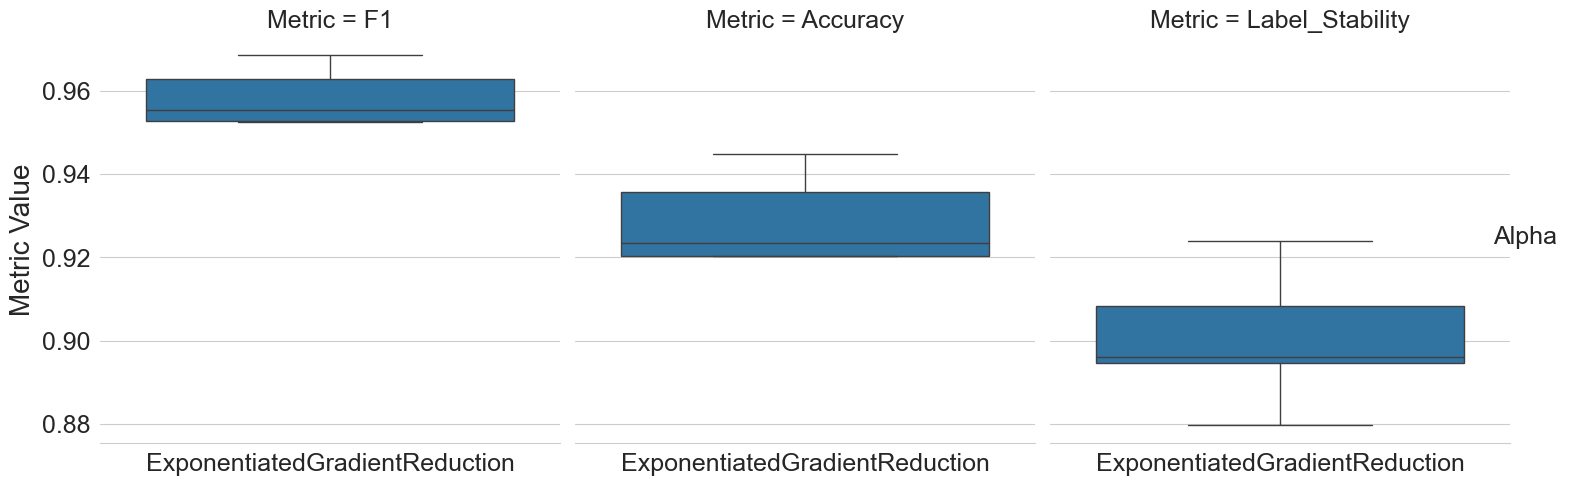

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

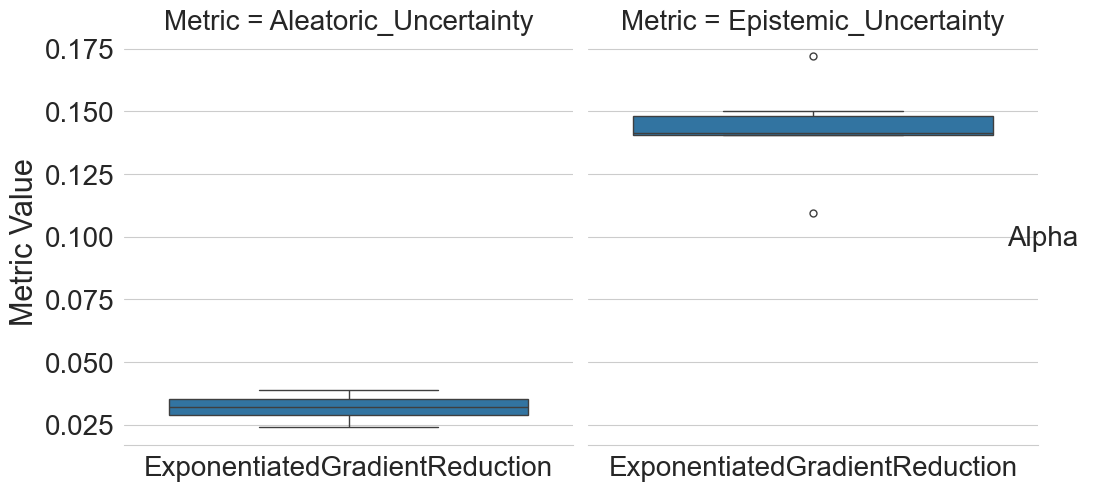

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

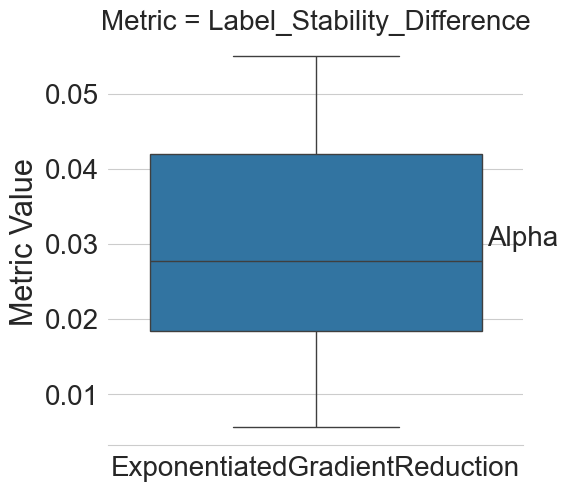

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

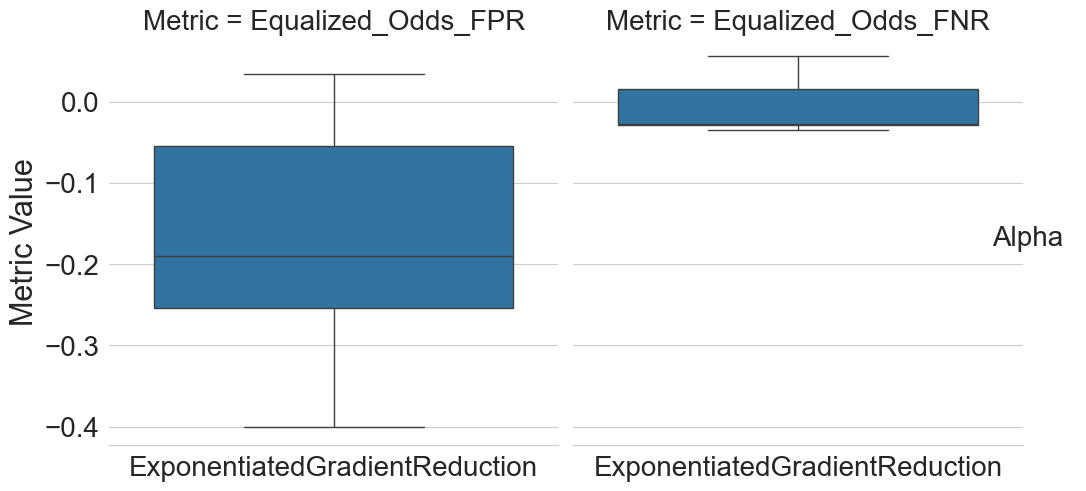

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

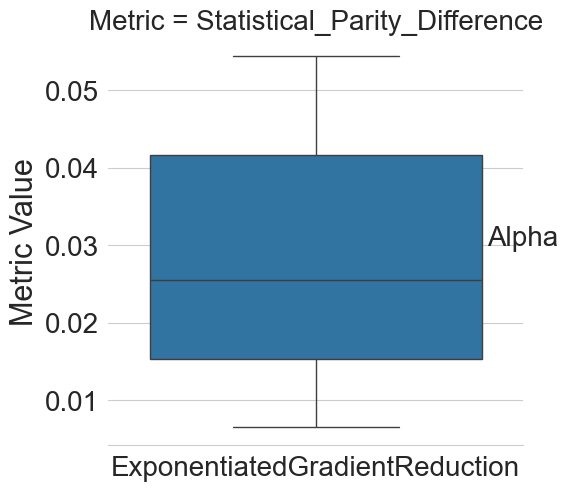

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)